# Introduction to Debugging

In this book, we want to explore _debugging_ - the art and science of fixing bugs in computer software. In particular, we want to explore techniques that _automatically_ answer questions like: Where is the bug? When does it occur? And how can we repair it? But before we start automating the debugging process, we first need to understand what this process is.

In this chapter, we introduce basic concepts of systematic software debugging and the debugging process, and at the same time get acquainted with Python and interactive notebooks.

**Prerequisites**

* The book is meant to be a standalone reference; however, a number of _great books on debugging_ are listed at the end,
* Knowing a bit of _Python_ is helpful for understanding the code examples in the book.

In [273]:
import bookutils

## A Simple Function

### Your Task: Remove HTML Markup

Let us start with a simple example. You may have heard of how documents on the Web are made out of text and HTML markup. HTML markup consists of _tags_ in angle brackets that surround the text, providing additional information on how the text should be interpreted. For instance, in the HTML text

```html
This is <em>emphasized</em>.
```

the word "emphasized" is enclosed in the HTML tags `<em>` (start) and `</em>` (end), meaning that it should be interpreted (and rendered) in an emphasized way – typically in italics. In your environment, the HTML text gets rendered as

> This is <em>emphasized</em>.

There's HTML tags for pretty much everything – text markup (<strong>bold</strong> text, <s>strikethrough</s> text), text structure (titles, lists), references (links) to other documents, and many more. These HTML tags shape the Web as we know it.

However, within all the HTML markup, it may become difficult to actually access the _text_ that lies within. We'd like to implement a simple function that removes _HTML markup_ and converts it into text. If our input is

```html
Here's some <strong>strong argument</strong>.
```
the output should be

> Here's some strong argument.

Here's a Python function which does exactly this. It takes a (HTML) string and returns the text without markup.

In [274]:
def remove_html_markup(s):
    tag   = False
    out   = ""

    for c in s:
        if c == '<':   # start of markup
            tag = True
        elif c == '>': # end of markup
            tag = False
        elif not tag:
            out = out + c
    
    return out

This function works, but not always. Before we start debugging things, let us first explore its code and how it works.

### Understanding Python Programs

If you're new to Python, you might first have to understand what the above code does.  We very much recommend the [Python tutorial](https://docs.python.org/3/tutorial/) to get an idea on how Python works.  The most important things for you to understand the above code are these three:

1. Python structures programs through _indentation_, so the function and `for` bodies are defined by being indented;
2. Python is _dynamically typed_, meaning that the type of variables like `x`, `approx`, or `guess` is determined at run-time.
3. Most of Python's syntactic features are inspired by other common languages, such as control structures (`while`, `if`, `for`), assignments (`=`), or comparisons (`==`, `!=`, `<`).

With that, you can already understand what the above code does: `remove_html_markup()` takes a (HTML) string `s` and then iterates over the individual characters (`for c in s`). By default, these characters are added to the return string `out`. However, if `remove_html_markup()` finds a `<` character, it sets the `tag` flag, meaning that all further characters are ignored until a `>` character is found.

In contrast to other languages, Python makes no difference between strings and characters – there's only strings. As in HTML, strings can be enclosed in single quotes (`'a'`) and in double quotes (`"a"`). This is useful if you want to specify a string that contains quotes, as in `'She said "hello", and then left'` or `"The first character is a 'c'"`

### Running a Function

To find out whether `remove_html_markup()` works correctly, we can *test* it with a few values.  For the string

```html
Here's some <strong>strong argument</strong>.
```

for instance, it produces the correct value:

In [275]:
remove_html_markup("Here's some <strong>strong argument</strong>.")

"Here's some strong argument."

### Interacting with Notebooks

If you are reading this in the interactive notebook, you can try out `remove_html_markup()` with other values as well.  Click on the above cells with the invocation of `remove_html_markup()` and change the value – say, to `remove_html_markup("<em>foo</em>")`.  Press `Shift+Enter` (or click on the play symbol) to execute it and see the result.  If you get an error message, go to the above cell with the definition of `remobve_html_markup()` and execute this first.  You can also run _all_ cells at once; see the Notebook menu for details.  (You can actually also change the text by clicking on it, and corect mistaks such as in this sentence.)

Executing a single cell does not execute other cells, so if your cell builds on a definition in another cell that you have not executed yet, you will get an error.  You can select `Run all cells above` from the menu to ensure all definitions are set.

Also keep in mind that, unless overwritten, all definitions are kept across executions.  Occasionally, it thus helps to _restart the kernel_ (i.e. start the Python interpreter from scratch) to get rid of older, superfluous definitions.

### Testing a Function

Since one can change not only invocations, but also definitions, we want to ensure that our function works properly now and in the future. To this end, we introduce tests through _assertions_ – a statement that fails if the given _check_ is false. The following assertion, for instance, checks that the above call to `remove_html_markup()` returns the correct value:

In [276]:
assert remove_html_markup("Here's some <strong>strong argument</strong>.") == "Here's some strong argument."

If you change the code of `remove_html_markup()` such that the above assertion fails, you will have introduced a bug.

## Oops! A Bug!

As nice and simple as `remove_html_markup()` is, it is buggy. Some HTML markup is not properly stripped away. Consider this HTML tag, which would render as an input field in a form:

```html
<input type="text" value="<your name>">
```
If we feed this string into `remove_html_markup()`, we would expect an empty string as the result. Instead, this is what we get:

In [277]:
remove_html_markup('<input type="text" value="<your name>">')

'"'

Every time we encounter a bug, this means that our earlier tests have failed. We thus need to introduce another test that documents not only how the bug came to be, but also the result we actually expected.

The assertion we write now fails with an error message. (The `ExpectError` magic ensures we see the error message, but the rest of the notebook is still executed.)

In [278]:
from ExpectError import ExpectError

In [279]:
with ExpectError():
    assert remove_html_markup('<input type="text" value="<your name>">') == ""

Traceback (most recent call last):
  File "<ipython-input-279-c7b482ebf524>", line 2, in <module>
    assert remove_html_markup('<input type="text" value="<your name>">') == ""
AssertionError (expected)


With this, we now have our task: _Fix the failure as above._

## Visualizing Code

To properly understand what is going on here, it helps drawing a diagram on how `remove_html_markup()` works. Technically, `remove_html_markup()` implements a _state machine_ with two states `tag` and `¬ tag`. We change between these states depending on the characters we process. This is visualized in the following diagram:

In [280]:
from graphviz import Digraph, nohtml

In [281]:
from IPython.display import display

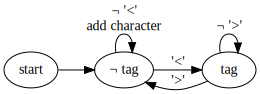

In [282]:
dot = Digraph(comment="remove_html_markup", graph_attr={'rankdir': 'LR'})
dot.node('start')
dot.edge('start', '¬ tag')
dot.edge('¬ tag', '¬ tag', label=" ¬ '<'\nadd character")
dot.edge('¬ tag', 'tag', label="'<'")
dot.edge('tag', '¬ tag', label="'>'")
dot.edge('tag', 'tag', label="¬ '>'")
display(dot)

You see that we start in the non-tag state (`¬ tag`). Here, for every character that is not `'<'`, we add the character and stay in the same state. When we read a `'<'`, though, we end in the tag state (`tag`) and stay in that state (skipping characters) until we find a closing `'>'` character.

## A First Fix

Let us now look at the above state machine, and process through our input:

```html
<input type="text" value="<your name>">
```

So what you can see is: We are interpreting the `'>'` of `"<your name>"` as the closing of the tag. However, this is a quoted string, so the `'>'` should be interpreted as a regular character, not as markup. This is an example of _missing functionality:_ We do not handle quoted characters correctly. We haven't claimed yet to take care of all functionality, so we still need to extend our code.

So we extend the whole thing.  We set up a special "quote" state which processes quoted inputs in tags until the end of the quoted string is reached. This is how the state machine looks like:

In [283]:
dot = Digraph(comment="remove_html_markup", graph_attr={'rankdir': 'LR'})
dot.node('start')
dot.edge('start', '¬ quote\n¬ tag')
dot.edge('¬ quote\n¬ tag', '¬ quote\n¬ tag', label="¬ '<'\nadd character")
dot.edge('¬ quote\n¬ tag', '¬ quote\ntag', label="'<'")
dot.edge('¬ quote\ntag', 'quote\ntag', label="'\"'")
dot.edge('¬ quote\ntag', '¬ quote\ntag', label="¬ '\"' ∧ ¬ '>'")
dot.edge('quote\ntag', 'quote\ntag', label="¬ '\"'")
dot.edge('quote\ntag', '¬ quote\ntag', label="'\"'")
dot.edge('¬ quote\ntag', '¬ quote\n¬ tag', label="'>'")

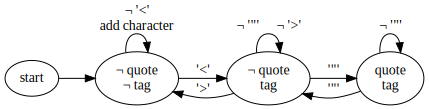

In [284]:
display(dot)

This is a bit more complex already. Proceeding from left to right, we first have the state `¬ quote ∧ ¬ tag`, which is our "standard" state for text. If we encounter a `'<'`, we again switch to the "tagged" state `¬ quote ∧ tag`. In this state, however (and only in this state), if we encounter a quotation mark, we switch to the "quotation" state `quote ∧ tag`, in which we remain until we see another quotation mark indicating the end of the string – and then continue in the "tagged" state `¬ quote ∧ tag` until we see the end of the string.

Things get even more complicated as HTML allows both single and double quotation characters. Here's a revised implementation of `remove_html_markup()` that takes the above states into account:

In [285]:
def remove_html_markup(s):
    tag   = False
    quote = False
    out   = ""

    for c in s:
        if c == '<' and not quote:
            tag = True
        elif c == '>' and not quote:
            tag = False
        elif c == '"' or c == "'" and tag:
            quote = not quote
        elif not tag:
            out = out + c
    
    return out

Now, our previous input works well:

In [286]:
remove_html_markup('<input type="text" value="<your name>">')

''

and our earlier tests also pass:

In [287]:
assert remove_html_markup("Here's some <strong>strong argument</strong>.") == "Here's some strong argument."

In [288]:
assert remove_html_markup('<input type="text" value="<your name>">') == ""

However, the above code still has a bug.  In two of these inputs, HTML markup is still not properly stripped:

```html
<b>foo</b>
<b>"foo"</b>
"<b>foo</b>"
<"b">foo</"b">
```

Can you guess which ones these are?

Again, a simple assertion will reveal the culprits:

In [289]:
with ExpectError():
    assert remove_html_markup('<b>foo</b>') == 'foo'

In [290]:
with ExpectError():
    assert remove_html_markup('<b>"foo"</b>') == '"foo"'

Traceback (most recent call last):
  File "<ipython-input-290-ebb80f5cdc78>", line 2, in <module>
    assert remove_html_markup('<b>"foo"</b>') == '"foo"'
AssertionError (expected)


In [291]:
with ExpectError():
    assert remove_html_markup('"<b>foo</b>"') == '"foo"'

Traceback (most recent call last):
  File "<ipython-input-291-1f9c40f6f95d>", line 2, in <module>
    assert remove_html_markup('"<b>foo</b>"') == '"foo"'
AssertionError (expected)


In [292]:
with ExpectError():
    assert remove_html_markup('<"b">foo</"b">') == 'foo'    

So, unfortunately, we're not done yet – our function still has errors.

## The Devil's Guide to Debugging

Let us now discuss a couple of methods that do _not_ work well for debugging. (These "devil's suggestions" are adapted from the 1993 book "Code Complete" from Steve McConnell.)

### Printf Debugging

When I was a student,  never got any formal training in debugging, so I had to figure this out for myself. What I learned was how to use _debugging output_; in Python, this would be the `print()` function. For instance, I would go and scatter `print()` calls everywhere:

In [293]:
def remove_html_markup_with_print(s):
    tag   = False
    quote = False
    out   = ""

    for c in s:
        print("c =", repr(c), "tag =", tag, "quote =", quote)

        if c == '<' and not quote:
            tag = True
        elif c == '>' and not quote:
            tag = False
        elif c == '"' or c == "'" and tag:
            quote = not quote
        elif not tag:
            out = out + c
    
    return out

This way of inspecting executions is commonly called "Printf debugging", after the C `printf()` function. Then, running this would allow me to see what's going on in my code:

In [294]:
remove_html_markup_with_print('<b>"foo"</b>')

c = '<' tag = False quote = False
c = 'b' tag = True quote = False
c = '>' tag = True quote = False
c = '"' tag = False quote = False
c = 'f' tag = False quote = True
c = 'o' tag = False quote = True
c = 'o' tag = False quote = True
c = '"' tag = False quote = True
c = '<' tag = False quote = False
c = '/' tag = True quote = False
c = 'b' tag = True quote = False
c = '>' tag = True quote = False


'foo'

Yes, one sees what is going on – but this is horribly inefficient!  Think of a 1,000-character input – you'd have to go through 2,000 lines of logs.  It may help you, but it's a total time waster.  Plus, you have to enter these statements, remove them again... it's a maintenance nightmare.

(You may even forget printf's in your code, creating a security problem: Mac OS X versions 10.7 to 10.7.3 would log the password in clear because someone had forgotten to turn off debugging output.)

### Debugging into Existence

I would also try to _debug the program into existence._  Just change things until they work.  Let me see: If I remove the conditions "and not quote" from the program, it would actually work again:

In [295]:
def remove_html_markup_without_quotes(s):
    tag   = False
    quote = False
    out   = ""

    for c in s:
        if c == '<': # and not quote:
            tag = True
        elif c == '>': # and not quote:
            tag = False
        elif c == '"' or c == "'" and tag:
            quote = not quote
        elif not tag:
            out = out + c
    
    return out

In [296]:
assert remove_html_markup_without_quotes('<"b">foo</"b">') == 'foo'    

Cool! Unfortunately, the function still fails on the other input:

In [297]:
with ExpectError():
    assert remove_html_markup_without_quotes('<b>"foo"</b>') == '"foo"'

Traceback (most recent call last):
  File "<ipython-input-297-1d8954a52bcf>", line 2, in <module>
    assert remove_html_markup_without_quotes('<b>"foo"</b>') == '"foo"'
AssertionError (expected)


So, maybe we can change things again, such that both work? And maybe the other tests we had earlier won't fail? Let's just continue to change things randomly again and again and again.

Oh, and of course, I would never back up earlier versions such that I would be able to keep track of what has changed and when.

### Use the Most Obvious Fix

My favorite: Use the most obvious fix.  This means that you're fixing the symptom, not the problem. In our case, this would be something like:

In [298]:
def remove_html_markup_fixed(s):
    if s == '<b>"foo"</b>':
        return '"foo"'
    
    ...

Miracle! Our earlier failing assertion now works! Now we can do the same for the other failing test, too, and we're done.
(Rumor has it that some programmers use this technique to get their tests to pass...)

### Things to do Instead

As with any devil's guide, you get an idea of how to do things by doing the _opposite._  What this means is:

1. Understand the code
2. Fix the problem, not the symptom
3. Proceed systematically

which is what we will apply for the rest of this chapter.

## From Defect to Failure – and Back Again

To understand how to systematically debug a program, we first have to understand how failures come to be. The typical debugging situation looks like this. We have a program (execution), taking some input and producing some output. The output is in *error* (✘), meaning an unwanted and unintended deviation from what is correct, right, or true.
The input, in contrast, is assumed to be correct (✔). (Otherwise, we wouldn't search for the bug in our program, but in whatever produced its input.)

In [299]:
PASS = "✔"
FAIL = "✘"
PASS_COLOR = 'darkgreen'  # '#006400' # darkgreen
FAIL_COLOR = 'red4'  # '#8B0000' # darkred

In [300]:
def execution_diagram(show_steps=True, variables=[], steps=3, error_step=666, until=666, fault_path=[]):
    dot = Digraph(comment="execution_steps", graph_attr={'rankdir': 'LR'})

    dot.node('input', shape='none', label=f"Input {PASS}", fontcolor=PASS_COLOR)
    last_outgoing_states = ['input']
    
    for step in range(1, min(steps + 1, until)):
        
        if step == error_step:
            step_label=f'Step {step} {FAIL}'
            step_color=FAIL_COLOR
        else:
            step_label=f'Step {step}'
            step_color=None

        if step >= error_step:
            state_label=f'State {step} {FAIL}'
            state_color=FAIL_COLOR
        else:
            state_label=f'State {step} {PASS}'
            state_color=PASS_COLOR
    
        state_name = f's{step}'
        outgoing_states = []
        incoming_states = []

        if not variables:
            dot.node(name=state_name, label=state_label, shape='box', color=state_color, fontcolor=state_color)
        else:
            var_labels = []
            for v in variables:
                vpath = f's{step}:{v}'
                if vpath in fault_path:
                    var_label = f'<{v}>{v} ✘'
                    outgoing_states.append(vpath)
                    incoming_states.append(vpath)
                else:
                    var_label = f'<{v}>{v}'
                var_labels.append(var_label)
            record_string = " | ".join(var_labels)
            dot.node(name=state_name, shape='record', label=nohtml(record_string), color=state_color, fontcolor=state_color)
            
        if not outgoing_states:
            outgoing_states = [state_name]
        if not incoming_states:
            incoming_states = [state_name]

        for outgoing_state in last_outgoing_states:
            for incoming_state in incoming_states:
                if show_steps:
                    dot.edge(outgoing_state, incoming_state, label=step_label, fontcolor=step_color)
                else:
                    dot.edge(outgoing_state, incoming_state)

        last_outgoing_states = outgoing_states

    if until > steps + 1:
        # Show output
        if error_step > steps:
            dot.node('output', shape='none', label=f"Output {PASS}", fontcolor=PASS_COLOR)
        else:
            dot.node('output', shape='none', label=f"Output {FAIL}", fontcolor=FAIL_COLOR)

        for outgoing_state in last_outgoing_states:
            if steps == 0:
                dot.edge(outgoing_state, 'output', label="Execution")
            else:
                dot.edge(outgoing_state, 'output')

    display(dot)

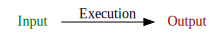

In [301]:
execution_diagram(show_steps=False, steps=0, error_step=0)

This situation we see above is what we call a *failure*: An externally visible _error_ in the program behavior, with the error again being an unwanted and unintended deviation from what is correct, right, or true.

How does this failure come to be? The execution we see above breaks down into several program _states_, one after the other.

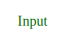

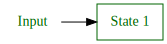

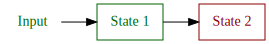

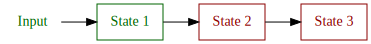

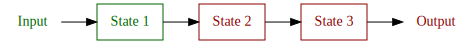

In [302]:
for until in range(1, 6):
    execution_diagram(show_steps=False, until=until, error_step=2)

Initially, the program state is still correct (✔). However, at some point in the execution, the state gets an _error_, also known as a *fault*. This fault – again an unwanted and unintended deviation from what is correct, right, or true – then propagates along the execution, until it becomes externally visible as a _failure_.
(In reality, there are many, many more states than just this, but these would not fit in a diagram.)

How does a fault come to be? Each of these program states is produced by a _step_ in the program code. These steps take a state as input and produce another state as output. Technically speaking, the program inputs and outputs are also parts of the program state, so the input flows into the first step, and the output is the state produced by the last step.

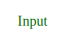

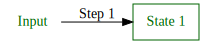

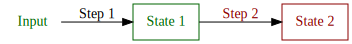

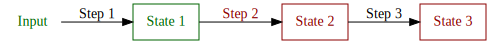

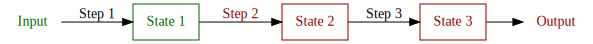

In [303]:
for until in range(1, 6):
    execution_diagram(show_steps=True, until=until, error_step=2)

Now, in the diagram above, Step 2 gets a _correct_ state as input and produces a _faulty_ state as output. The produced fault then propagates across more steps to finally become visible as a _failure_.

The goal of debugging thus is to _search_ for the step in which the state first becomes faulty. The _code_ associated with this step is again in error – an unwanted and unintended deviation from what is correct, right, or true – and is called a _defect_. This is what we have to find – and to fix.

Sounds easy, right? Unfortunately, things are not that easy, and that has something to do with the program state. Let us assume our state consists of three variables, `v1` to `v3`, and that Step 2 produces a fault in `v2`. This fault then propagates to the output:

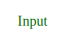

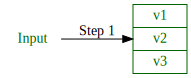

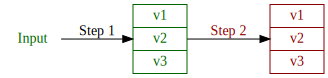

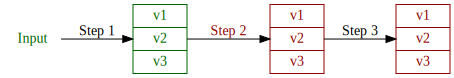

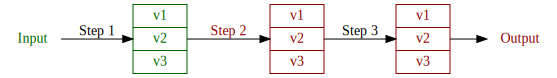

In [304]:
for until in range(1, 6):
    execution_diagram(show_steps=True, variables=['v1', 'v2', 'v3'], error_step=2, 
                      until=until, fault_path=['s2:v2', 's3:v2'])

The way these faults propagate is called a *cause-effect chain*:

* The _defect_ in the code _causes_ a fault in the state when executed.
* This _fault_ in the state then _propagates_ through further execution steps...
* ... until it becomes visible as a _failure_.

Note that not every defect also causes a failure, which is despite all testing, there can still be defects in the code looming around until the right conditions are met to trigger them. On the other hand, though, _every failure can be traced back to the defect that causes it_.

To this end, we _trace back_ these faults along their _dependencies_ – that is, we find out which faults in the earlier state have caused the later faults. We start from the very end of the execution and then gradually progress backwards in time, examining fault after fault until we find a _transition_ from a correct state to a faulty state – that is, a
step in which a correct state comes in and a faulty state comes out. At this point, we have found the origin of the failure – and the defect that causes it.

What sounds like a straight-forward strategy, unfortunately, doesn't always work this way in practice. That is because of the following problems of debugging:

* First, program states are actually _large_, encompassing dozens to thousands of variables, possibly even more. If you have to search all of these manually and check them for faults, you will spend a lot of time for a single state.

* Second, you do not always know _whether a state is correct or not._ While most programs have some form of specification for their inputs and outputs, these do not necessarily exist for intermediate results. If one had a specification that could check each state for correctness (possibly even automatically), debugging would be trivial. Unfortunately, it is not, and that's partly due to the lack of specifications.

* Third, executions typically do not come in a handful of steps, as in the diagrams above; instead, they can easily encompass _thousands to millions of steps._ This means that you will have to examine not just one state, but several, making the problem much worse.

To make your search efficient, you thus have to _focus_ your search – starting with most likely causes and gradually progressing to the less probable causes. This is what we call a _debugging strategy_.

## Synopsis

_For those only interested in using the code in this chapter (without wanting to know how it works), give an example.  This will be copied to the beginning of the chapter (before the first section) as text with rendered input and output._

## Lessons Learned

* _Lesson one_
* _Lesson two_
* _Lesson three_

## Next Steps

_Link to subsequent chapters (notebooks) here, as in:_

* [use _mutations_ on existing inputs to get more valid inputs](MutationFuzzer.ipynb)
* [use _grammars_ (i.e., a specification of the input format) to get even more valid inputs](Grammars.ipynb)
* [reduce _failing inputs_ for efficient debugging](Reducer.ipynb)


## Background

_Cite relevant works in the literature and put them into context, as in:_

The idea of ensuring that each expansion in the grammar is used at least once goes back to Burkhardt \cite{Burkhardt1967}, to be later rediscovered by Paul Purdom \cite{Purdom1972}.

## Exercises

_Close the chapter with a few exercises such that people have things to do.  To make the solutions hidden (to be revealed by the user), have them start with_

```
**Solution.**
```

_Your solution can then extend up to the next title (i.e., any markdown cell starting with `#`)._

_Running `make metadata` will automatically add metadata to the cells such that the cells will be hidden by default, and can be uncovered by the user.  The button will be introduced above the solution._

### Exercise 1: _Title_

_Text of the exercise_

In [305]:
# Some code that is part of the exercise
pass

_Some more text for the exercise_

**Solution.** _Some text for the solution_

In [306]:
# Some code for the solution
2 + 2

4

_Some more text for the solution_

### Exercise 2: _Title_

_Text of the exercise_

**Solution.** _Solution for the exercise_